In [9]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Studies in Digital Signal Processing, Project 3

### Initial auxiliary functions

In [10]:
def plot_freq_response(x_mag: np.ndarray, x_phase: np.ndarray, name: str) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), layout='constrained')
    plt.setp(ax[:], xlabel='Angular frequency ($\omega$)')
    plt.setp(ax[0], ylabel='Magnitude')
    plt.setp(ax[1], ylabel='Phase (Degrees)')
    ax[0].plot(x_mag)
    plt.setp(ax[0], title=f'Magnitude Spectrum ({name}[$\omega$])')
    ax[1].plot(x_phase)
    plt.setp(ax[1], title=f'Phase Spectrum ({name}[$\omega$])')
    plt.show()



## Section 1

Consider a signal $x\left(t\right) = 8 \cdot \text{rect}\left(t\right)$, where:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{if} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{if} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{if} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Consider that the signal will be sampled at a rate $T = \frac{1}{8}$ s, and that we want a resolution at a frequency of $f_0 = \frac{1}{4}$ Hz.



### Section 1-A

Firstly, we will obtain the signal $x\left[n\right]$, as a sample of $x\left(t\right)$ .

For a frequency of $\frac{1}{4}$ $Hz$, we sample $x(t)$ from $0$ to $4$ with $\frac{4-0}{\frac{1}{8}} = 32$ samples.

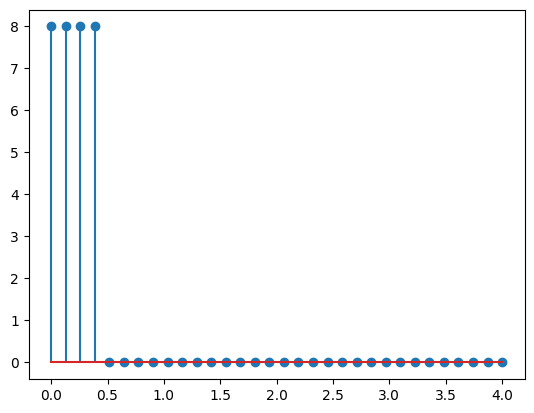

In [11]:
def ret(n: int) -> float:
    if n > 0.5:
        return 0
    if n == 0.5:
        return 0.5
    return 1


nsamples = 32
n = np.linspace(0, 4, nsamples)
x_n = 8*np.array([ret(i) for i in n])
plt.stem(n, x_n)
plt.show()

### Section 1-B

Let's compare the real Fourier transform of the signal $x\left(t\right)$ with the Discrete Fourier Transform obtained from $x\left[n\right]$ .

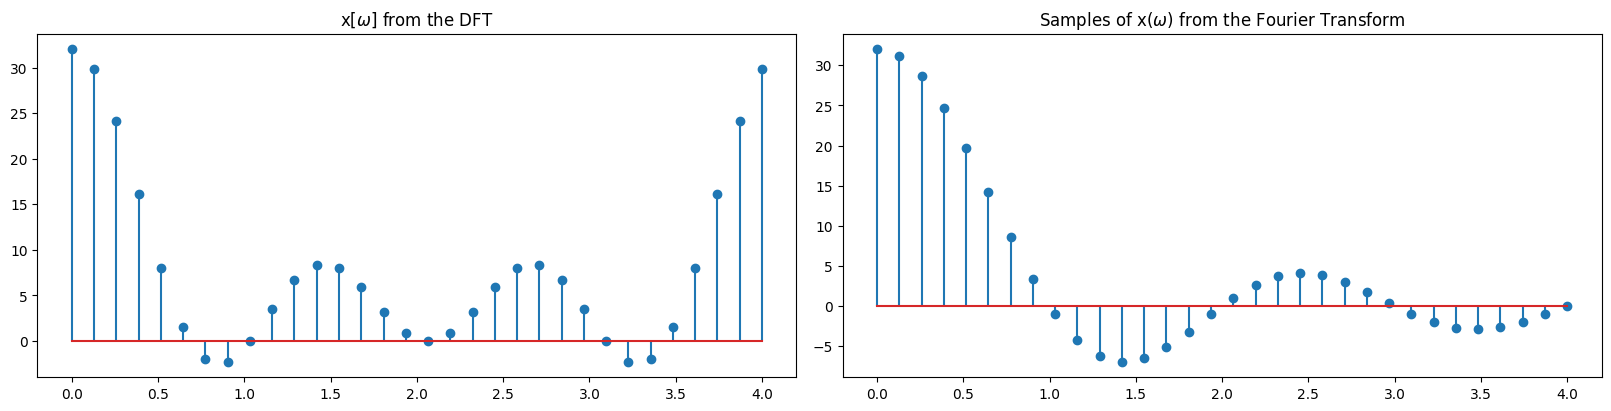

In [12]:
def dft(x: np.ndarray) -> np.ndarray:
    length = len(x)
    w_n = 2*np.pi/length
    response = np.zeros(length, dtype=complex)
    for i in range(length):
        for j in range(length):
            response[i] += x[j] * np.exp(-1j * i * j * w_n)
    return response


x_w_1 = np.real(dft(x_n))
x_w_2 = 32 * np.sinc(n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), layout='constrained')
ax[0].stem(n, x_w_1)
plt.setp(ax[0], title='x[$\omega$] from the DFT')
ax[1].stem(n, x_w_2)
plt.setp(ax[1], title='Samples of x($\omega$) from the Fourier Transform')
plt.show()


Comparing the graphs, we obtained a reasonably similar appearance to a $sinc$, which is the Fourier Transform of the function $ret$. We observed, however, the presence of aliasing in the graph obtained from the DFT, which is expected since the function $sinc$ is a function with infinite support.

## Section 2

Consider a signal $x\left[n\right]$ with $N = 256$ samples, where:
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{if} ~~ n < 64 \\
															 0 & \text{if} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Consider now an ideal low-pass filter $H_1$ with normalized cutoff frequency equal to $\frac{1}{16}$.

### Section 2-A

Let's filter the signal $x\left[n\right]$ with the filter $H_1$, obtaining the signal $y\left[n\right]$. We will also compare the original signal $x\left[n\right]$ with the obtained signal $y\left[n\right]$.

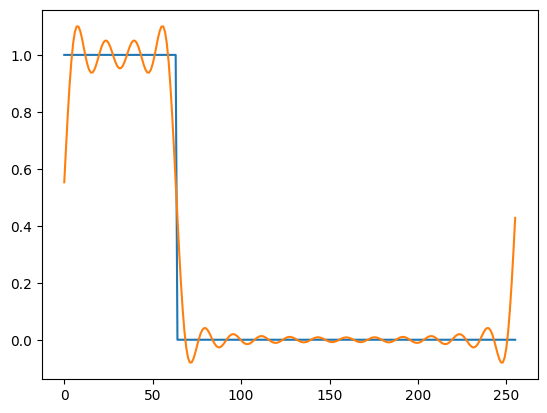

In [13]:
def x(n: int) -> int:
    return n < 64


def h(x: np.ndarray, f_o: float) -> int:
    length = len(x)
    response = np.zeros(length, dtype=complex)
    for i in range(length):
        if i <= f_o or i >= length-f_o:
            response[i] = x[i]
    return response


def idft(x: np.ndarray) -> np.ndarray:
    length = len(x)
    w_n = 2*np.pi/length
    response = np.zeros(length, dtype=complex)
    for i in range(length):
        for j in range(length):
            response[i] += x[j] * np.exp(1j * w_n * i * j)
    return (1/length) * response


nsamples = 256
n = np.linspace(0, 256, nsamples)
x_n = x(n) #x[n]
x_w = dft(x_n) # x[w]
f_o = nsamples * (1/16) # Cutoff frequency
y_w = h(x_w, f_o) # y[w]
y_n = idft(y_w) # y[n]

plt.plot(x_n)
plt.plot(np.real(y_n))
plt.show()


By comparing the signals $x[n]$ in blue, and $y[n]$ in orange, we conclude that there is a certain degree of similarity between them.

### Section 2-B

Let's now compare the spectrum of the signal $x\left[n\right]$ with the spectrum of the signal $y\left[n\right]$.

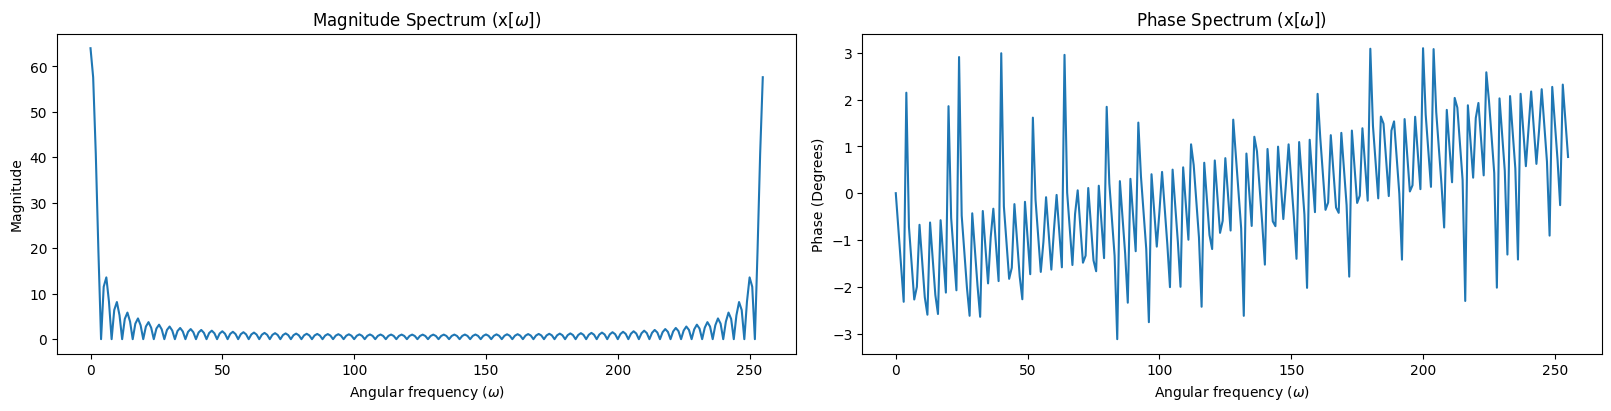

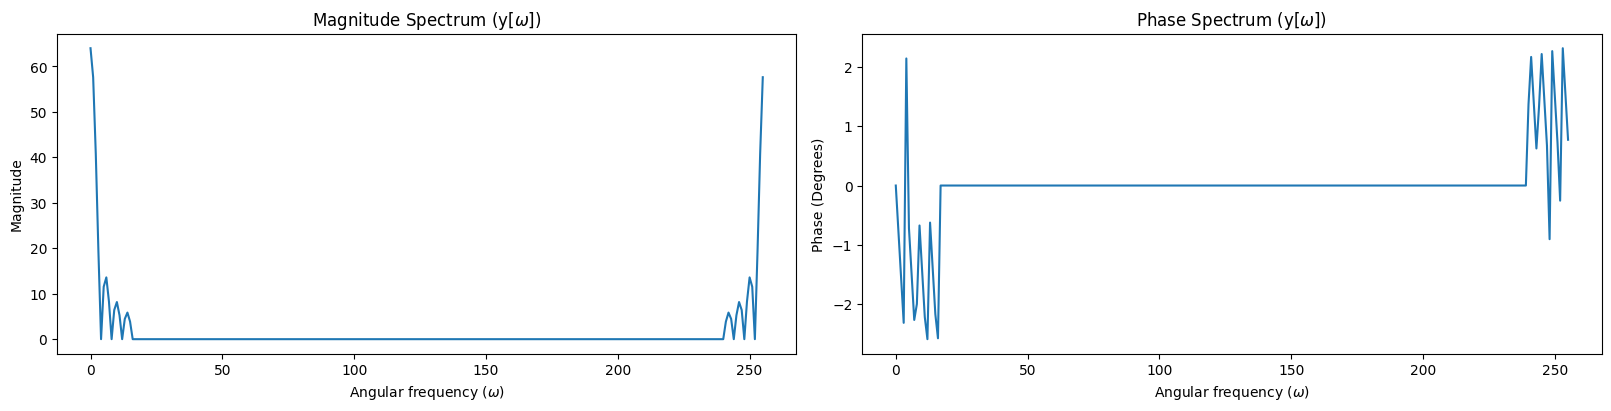

In [14]:
x_mag = abs(x_w)
x_phase = np.angle(x_w)
y_mag = abs(y_w)
y_phase = np.angle(y_w)
plot_freq_response(x_mag, x_phase, 'x')
plot_freq_response(y_mag, y_phase, 'y')



## Questão 2c (1.0  ponto)

In this section, we will apply the filter $H_1$ to the signal contained in the file "noisy_ecg2.mat", and also plot the original signal and the filtered signal, as well as their spectra.


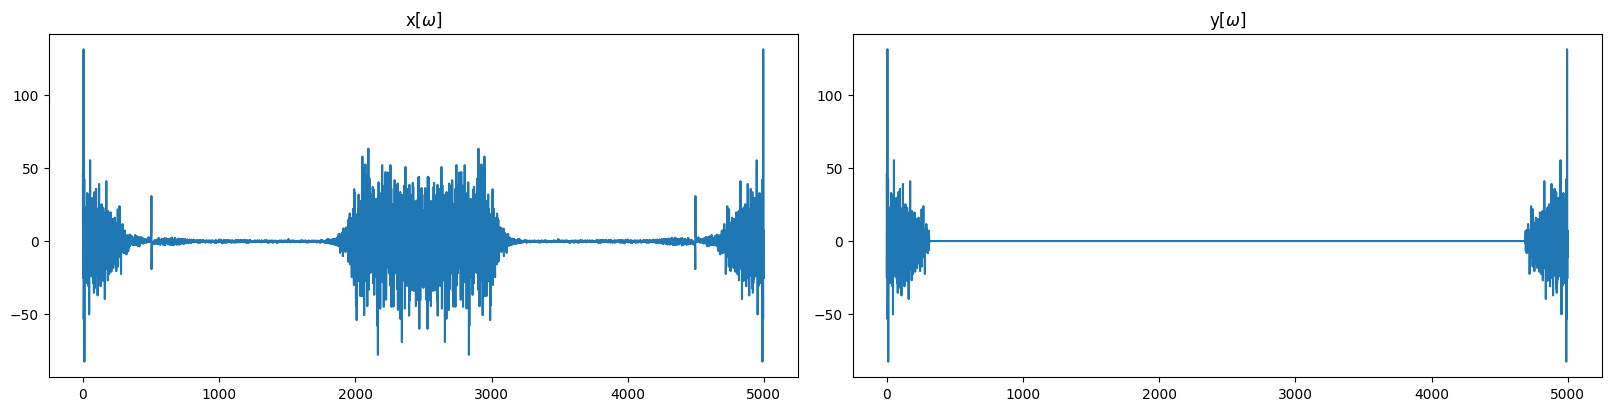

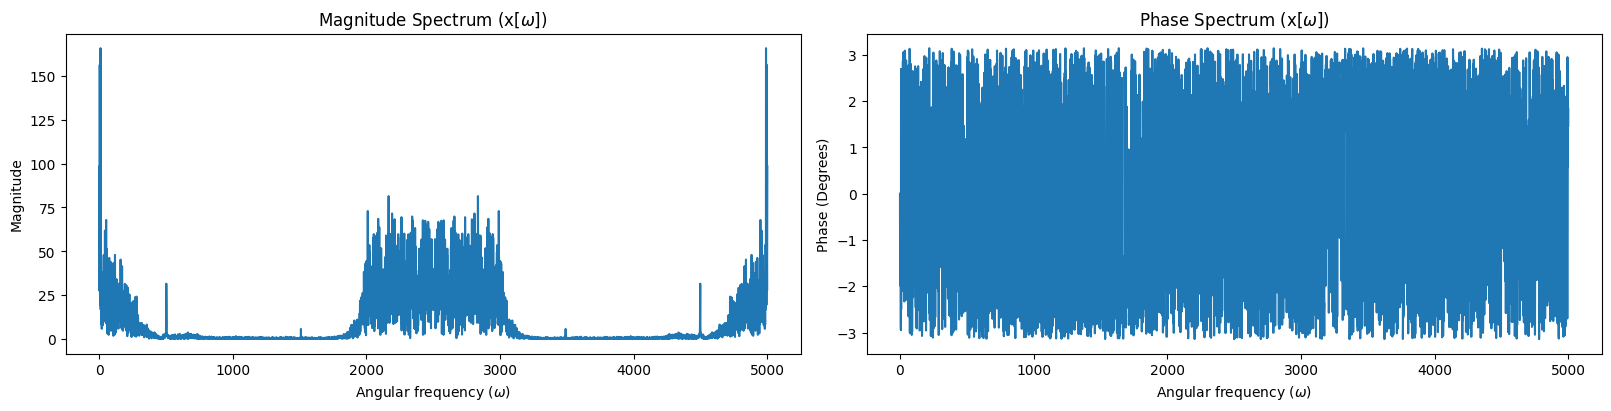

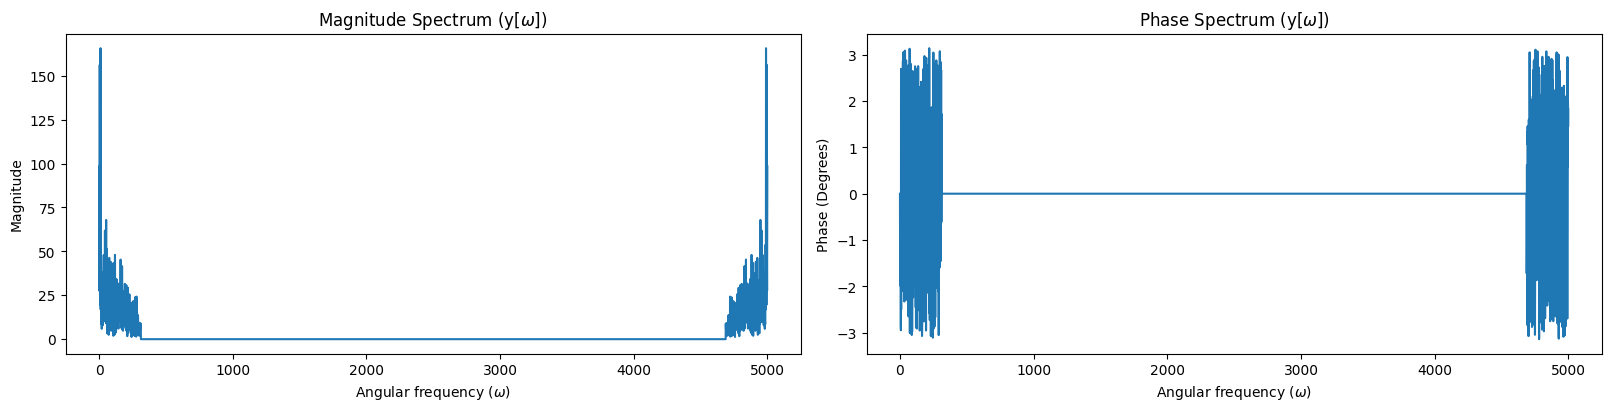

In [15]:
signal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()
x_w = sp.fftpack.fft(signal) # Fast Fourier Transform do módulo scipy
f_o = len(signal) * (1/16) # Cutoff frequency
y_w = h(x_w, f_o)
# Magnitude and Phase Spectra of x[w] and y[w]
x_mag = abs(x_w)
x_phase = np.angle(x_w)
y_mag = abs(y_w)
y_phase = np.angle(y_w)
# Plot x[w], y[w] and their spectra
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), layout='constrained')
ax[0].plot(np.real(x_w))
plt.setp(ax[0], title='x[$\omega$]')
ax[1].plot(np.real(y_w))
plt.setp(ax[1], title='y[$\omega$]')
plt.show()
plot_freq_response(x_mag, x_phase, 'x')
plot_freq_response(y_mag, y_phase, 'y')


## Section 3

The keypad of a cell phone uses signals of different frequencies to specify which buttons have been pressed. The keypad has 12 buttons, arranged in four rows and three columns. When a button is pressed, a signal is generated by the sum of two sinusoidal tones with different frequencies. The higher frequency indicates the column of the key pressed, while the lower frequency indicates the row of the key pressed. The frequencies are generated according to the table:

| | | Column | |
| :-: | :-: | :-: | :-: |
| Row | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

The sampling frequency is 8192 Hz, and each keystroke lasts one second. In this section, we will write a program that automatically decodes a signal composed of a telephone number generated with these characteristics, and also test our program with the signals found in the file "touch_fone.mat".


In [16]:
lines = {697: 0, 770: 1, 852: 2, 940: 3}
cols = {1209: 0, 1336: 1, 1477: 2}
frequencies = [697, 770, 852, 940, 1209, 1336, 1477]
matrix = [
    ['1', '2', '3'],
    ['4', '5', '6'],
    ['7', '8', '9'],
    ['*', '0', '#']]


def custom_dft(signal: np.ndarray) -> np.ndarray:
    length = len(signal)
    w_n = 2*np.pi / length
    response = np.zeros(length, dtype=complex)
    for i in frequencies:
        for j in range(length):
            response[i] += signal[j] * np.exp(-1j * i * j * w_n)
    return response


def get_num(signal: np.ndarray) -> str:
    length = len(signal)
    nsamples = 8192
    phone_num = []
    for i in range(0, length, nsamples):
        digit = signal[i : i+nsamples]
        decoded = custom_dft(digit)
        line = [lines[j] for j in lines if abs(decoded[j]) > 1][0]
        col = [cols[j] for j in cols if abs(decoded[j]) > 1][0]
        phone_num.append(matrix[line][col])
    return ''.join(phone_num)


signal_x = sp.io.loadmat('touch_fone.mat')['x'].ravel()
signal_y = sp.io.loadmat('touch_fone.mat')['y'].ravel()
signal_z = sp.io.loadmat('touch_fone.mat')['z'].ravel()
print('Decoded phone number 1:', get_num(signal_x))
print('Decoded phone number 2:', get_num(signal_y))
print('Decoded phone number 3:', get_num(signal_z))




Decoded phone number 1: 31075580
Decoded phone number 2: 911
Decoded phone number 3: 2446712
